In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flowtracks.io import iter_trajectories_ptvis
%matplotlib inline

In [17]:
# see openptv forum for Christophe Henry messages
inName = "./test_data/ptv_is.%d" 
# or use the test data
# inName = "./test_data/ptv_is.%d" # the directory with the input files

In [21]:
#----parameters
traj_min_len = 10 # in this particular example we have short trajectories

#----cal traj.
trajects = list(iter_trajectories_ptvis(inName, first=101000, last=101025, traj_min_len=traj_min_len))

In [22]:
print(f"{len(trajects)} trajectories")

295 trajectories


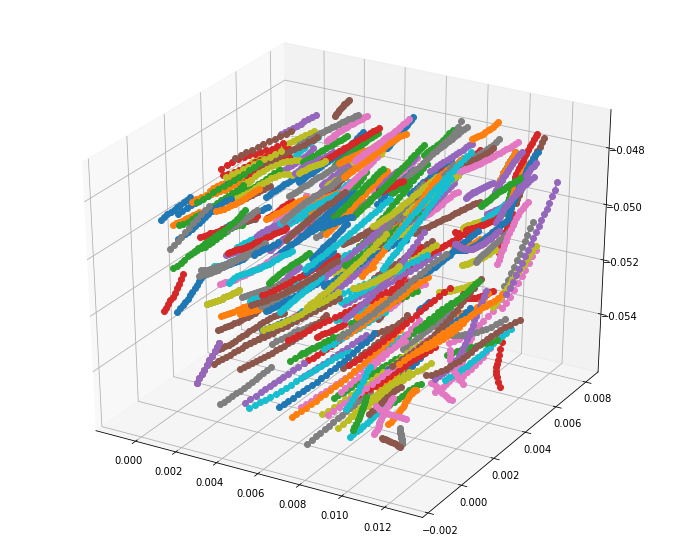

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for tr in trajects: # generate one trajectory per loop call
    plt.plot(tr.pos()[:,0],tr.pos()[:,1],tr.pos()[:,2], '-o')

In [24]:
# velocity histograms

u,v,w = [],[],[]
ax,ay,az = [],[],[]

for tr in trajects:
    u.append(tr.velocity()[:,0])
    v.append(tr.velocity()[:,1])
    w.append(tr.velocity()[:,2])
    
    ax.append(tr.accel()[:,0])
    ay.append(tr.accel()[:,1])
    az.append(tr.accel()[:,2])

(-0.001, 0.001)

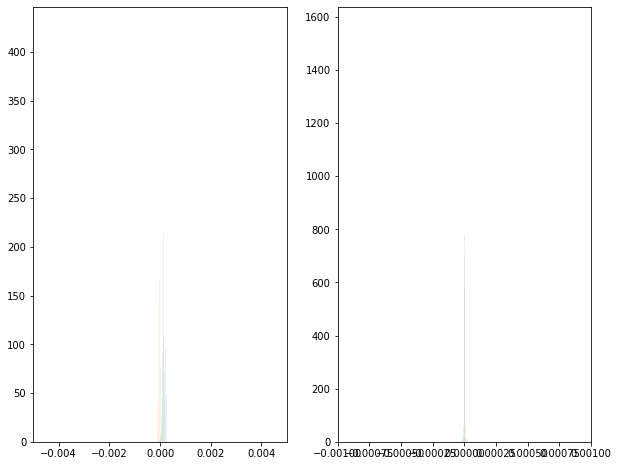

In [25]:
fig,a = plt.subplots(1,2,figsize=(10,8))

a[0].hist(np.hstack(u),100,alpha=0.1);
a[0].hist(np.hstack(v),100,alpha=0.1);
a[0].hist(np.hstack(w),100,alpha=0.1);

a[1].hist(np.hstack(ax),100,alpha=0.1);
a[1].hist(np.hstack(ay),100,alpha=0.1);
a[1].hist(np.hstack(az),100,alpha=0.1);
a[0].set_xlim(-0.005,0.005)
a[1].set_xlim(-0.001,0.001)

In [40]:
def plot_vel_pdfs(traj_list, fit_gaussian=True, bins=100, bin_range=None, ax=None):
    '''
    will generate a pdf of trajectory vecolicties and if specified 
    by (fit_gaussian = True) will fit a gaussian to the data
    '''
    vx,vy,vz = [],[],[]
    M = -1.0
    for i in traj_list:
        v = i.velocity()
        for j in range(v.shape[0]):
            vx.append(v[j, 0])
            vy.append(v[j, 1])
            vz.append(v[j, 2])
        if np.amax(np.abs(v)) > M:
            M = np.amax(np.abs(v))
    
    if bin_range==None:
        bin_range=(-M,M)
    
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.get_figure()
        
    c = ['b','r','g']
    shp = ['o','d','v']
    lbl = [r'$v_x$',r'$v_y$',r'$v_z$']
    
    for e,i in enumerate([vx, vy, vz]):
        h = np.histogram(i, bins=bins, density=True, range=bin_range)
        x,y = 0.5*(h[1][:-1] + h[1][1:]), h[0]
        m,s = np.mean(i), np.std(i)
        xx = np.arange(-M,M,2.0*M/500)
        ax.plot(x,y,c[e]+shp[e]+'-',lw=0.4,
                label = lbl[e]+r' $\mu = %.3f$ $\sigma = $%0.3f'%(m,s))
        if fit_gaussian:
            ax.plot(xx, gaussian(xx, m, s), c[e], lw = 1.2)
        
    ax.legend()
    ax.set_xlabel(r'$v_i$')
    ax.set_ylabel(r'P($v_i$)')
    
    return fig, ax

def gaussian(x,m,s):
    return 1.0/np.sqrt(2*np.pi)/s * np.exp(-0.5 * ((x-m)/s)**2)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb26361e90>)

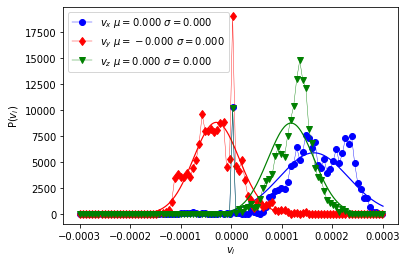

In [41]:
plot_vel_pdfs(trajects)

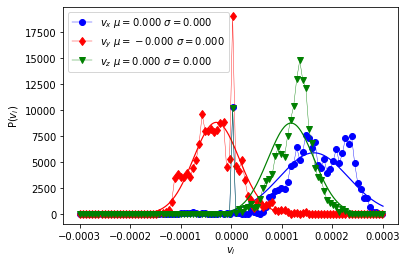

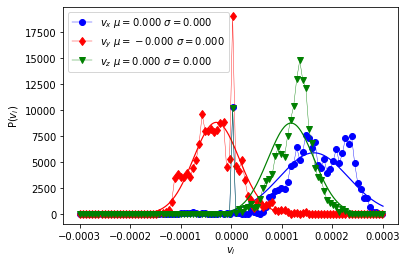

In [42]:
fig1,ax1 = plot_vel_pdfs(trajects); fig2,ax2 = plot_vel_pdfs(trajects);

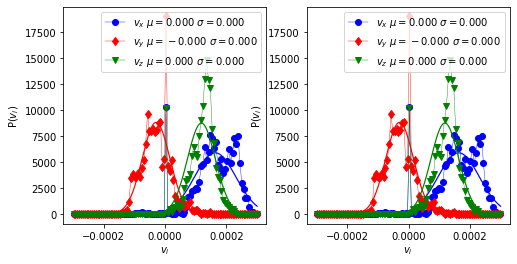

In [52]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

plot_vel_pdfs(trajects,ax=ax[0]); plot_vel_pdfs(trajects,ax=ax[1]);